In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# path
DATA_FOLDER = 'Data/MovieSummaries/'
CHARACTER_DATASET = DATA_FOLDER + 'character.metadata.tsv'
MOVIE_DATASET = DATA_FOLDER + 'movie.metadata.tsv'

# Dataset loading
characters = pd.read_csv(CHARACTER_DATASET, sep='\t', header=None)
movies = pd.read_csv(MOVIE_DATASET, sep='\t', header=None)

# define the name for each columns
characters.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name',
                      'Actor date of birth', 'Actor gender', 'Actor height (in meters)', 'Actor ethnicity (Freebase ID)',
                      'Actor name', 'Actor age at movie release', 'Freebase character/actor map ID', 'Freebase character ID',
                      'Freebase actor ID']
movies.columns = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue',
                  'Movie runtime', 'Movie languages (Freebase ID:name tuples)', 'Movie countries (Freebase ID:name tuples)',
                  'Movie genres (Freebase ID:name tuples)']


 ## Prepare the movie dataset

### Removing movies with missing values

In [4]:
# Verify the missing values 
print(movies.isna().sum())

# Drop the films without release dat, box office revenue or runtime 
movies = movies.dropna(subset=['Movie release date', 'Movie box office revenue', 'Movie runtime'])

if movies.isna().sum().sum() == 0:
    print("No missing values")
else:
    print(movies.isna().sum())


Wikipedia movie ID                           0
Freebase movie ID                            0
Movie name                                   0
Movie release date                           0
Movie box office revenue                     0
Movie runtime                                0
Movie languages (Freebase ID:name tuples)    0
Movie countries (Freebase ID:name tuples)    0
Movie genres (Freebase ID:name tuples)       0
dtype: int64
No missing values


### Create a column 'Release year' which contains the release year of the movie

In [10]:
# Convert the release date column in datetime
movies['Movie release date'] = pd.to_datetime(movies['Movie release date'], errors='coerce')

# Extract the year and convert it in int
movies['Release year'] = movies['Movie release date'].dt.year
movies['Release year'] = movies['Release year'].astype(int)

print(movies[['Movie name', 'Movie release date', 'Release year']].head())

                  Movie name Movie release date  Release year
0             Ghosts of Mars         2001-08-24          2001
7   Alexander's Ragtime Band         1938-08-16          1938
13                   Henry V         1989-11-08          1989
17              Mary Poppins         1964-08-27          1964
21            New Rose Hotel         1999-10-01          1999


 ### Extract and store the movie genres in a column named 'Movie genres'

In [34]:
import json

# Function to extract genres from a JSON-formatted string
def extract_genres(genre_data):
    if isinstance(genre_data, str):
        try:
            # Replace specific occurrences of 'Children's' with 'Children'
            genre_data = genre_data.replace("Children's", "Children")

            # Convert the genre data into a dictionary
            genres_dict = json.loads(genre_data)
            return ", ".join(genres_dict.values())  # Return the genres as a comma-separated string
        except json.JSONDecodeError:
            print(f"Error decoding JSON: {genre_data}")
            return "Unknown_1"  # Return "Unknown" in case of a parsing error
    else:
        return "Unknown_2"  # If the data is not a string, return "Unknown"

# Apply this function to the movie genres column
movies['Movie genres'] = movies['Movie genres (Freebase ID:name tuples)'].apply(extract_genres)

# Check the results
print(movies[['Movie name', 'Movie genres', 'Movie genres (Freebase ID:name tuples)']].head(5))

# Display the count of different genres
print(movies['Movie genres'].value_counts())


                  Movie name  \
0             Ghosts of Mars   
7   Alexander's Ragtime Band   
13                   Henry V   
17              Mary Poppins   
21            New Rose Hotel   

                                         Movie genres  \
0   Thriller, Science Fiction, Horror, Adventure, ...   
7                    Musical, Comedy, Black-and-white   
13  Costume drama, War film, Epic, Period piece, D...   
17  Children/Family, Musical, Fantasy, Comedy, Dra...   
21  Thriller, Science Fiction, Future noir, Indie,...   

               Movie genres (Freebase ID:name tuples)  
0   {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
7   {"/m/04t36": "Musical", "/m/01z4y": "Comedy", ...  
13  {"/m/04xvh5": "Costume drama", "/m/082gq": "Wa...  
17  {"/m/0hj3myq": "Children's/Family", "/m/04t36"...  
21  {"/m/01jfsb": "Thriller", "/m/06n90": "Science...  
Drama                                                                                      139
Romantic comedy, Romance Film, Co

### Store the language in a column named 'Movie languages'

In [38]:
import json

# Function to extract the language from a JSON-formatted string
def extract_language(language_data):
    if isinstance(language_data, str):
        try:
            # Convert the language data into a dictionary (assuming it's structured like genres)
            languages_dict = json.loads(language_data)
            # Assuming language is one of the values, you can modify this part depending on the actual structure
            return ", ".join(languages_dict.values())  # Return the language(s) as a comma-separated string
        except json.JSONDecodeError:
            print(f"Error decoding JSON: {language_data}")
            return "Unknown_1"  # Return "Unknown" in case of a parsing error
    else:
        return "Unknown_2"  # If the data is not a string, return "Unknown"

# Apply this function to extract the language
movies['Movie languages'] = movies['Movie languages (Freebase ID:name tuples)'].apply(extract_language)

# Check the results
print(movies[['Movie name', 'Movie languages', 'Movie languages (Freebase ID:name tuples)']].head(5))

# Display the count of different languages
print(movies['Movie languages'].value_counts())


                  Movie name   Movie languages  \
0             Ghosts of Mars  English Language   
7   Alexander's Ragtime Band  English Language   
13                   Henry V  English Language   
17              Mary Poppins  English Language   
21            New Rose Hotel  English Language   

   Movie languages (Freebase ID:name tuples)  
0         {"/m/02h40lc": "English Language"}  
7         {"/m/02h40lc": "English Language"}  
13        {"/m/02h40lc": "English Language"}  
17        {"/m/02h40lc": "English Language"}  
21        {"/m/02h40lc": "English Language"}  
English Language                                                                     5837
                                                                                      243
English Language, Spanish Language                                                    215
Korean Language                                                                       207
French Language, English Language                        

### Store the movies countries in a column named 'Movie countries'

In [42]:
import json

# Function to extract the countries from a JSON-formatted string
def extract_countries(country_data):
    if isinstance(country_data, str):
        try:
            # Convert the country data into a dictionary (assuming it's structured like genres)
            countries_dict = json.loads(country_data)
            # Assuming countries are one of the values, you can modify this part depending on the actual structure
            return ", ".join(countries_dict.values())  # Return the countries as a comma-separated string
        except json.JSONDecodeError:
            print(f"Error decoding JSON: {country_data}")
            return "Unknown_1"  # Return "Unknown" in case of a parsing error
    else:
        return "Unknown_2"  # If the data is not a string, return "Unknown"

# Apply this function to extract the countries
movies['Movie countries'] = movies['Movie countries (Freebase ID:name tuples)'].apply(extract_countries)

# Check the results
movies[['Movie name', 'Movie countries', 'Movie countries (Freebase ID:name tuples)']].head(5)

,Movie name,Movie countries,Movie countries (Freebase ID:name tuples)
0,Ghosts of Mars,United States of America,"{""/m/09c7w0"": ""United States of America""}"
7,Alexander's Ragtime Band,United States of America,"{""/m/09c7w0"": ""United States of America""}"
13,Henry V,United Kingdom,"{""/m/07ssc"": ""United Kingdom""}"
17,Mary Poppins,United States of America,"{""/m/09c7w0"": ""United States of America""}"
21,New Rose Hotel,United States of America,"{""/m/09c7w0"": ""United States of America""}"


## Prepare the character dataset 

### Remove character with missing values

In [52]:
characters.head(500)


,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,20393685,/m/04zz4c7,1924-03-24,Mrs. Marlowe,1860-05-24,F,NaN,NaN,Emily Fitzroy,NaN,/m/0mv1qlp,/m/0mv3k25,/m/0gsl6f
1512,20393685,/m/04zz4c7,1924-03-24,Elizabeth Channing,1877-11-02,F,1.630,NaN,Claire McDowell,NaN,/m/0mv1ql_,/m/0mv3k19,/m/03c1x11
1513,20393685,/m/04zz4c7,1924-03-24,William Marlowe,1864-10,M,NaN,NaN,George Nichols,NaN,/m/0mv1qkx,/m/0mv3k1z,/m/03c8tq3
1514,20393685,/m/04zz4c7,1924-03-24,Bob,1885-10-04,M,NaN,NaN,Harvey Clark,NaN,/m/0mv1qlj,/m/0mv3j_0,/m/03cbl00


In [51]:
# Verify the missing values 
print(characters.isna().sum())

# Drop the character without name, actor or date of birth 
#characters = characters.dropna(subset=['Character name', 'Actor date of birth', 'Actor name'])

print(characters['Movie release date'].value_counts())

Wikipedia movie ID                     0
Freebase movie ID                      0
Movie release date                  1582
Character name                         0
Actor date of birth                    0
Actor gender                         360
Actor height (in meters)           64754
Actor ethnicity (Freebase ID)      89668
Actor name                             1
Actor age at movie release         16309
Freebase character/actor map ID        0
Freebase character ID                  0
Freebase actor ID                      0
dtype: int64
2008          979
2009          974
2006          965
2007          823
2005          805
             ... 
1965-08-03      1
1985-09-12      1
1913-07-31      1
1956-01-11      1
1944-11-20      1
Name: Movie release date, Length: 11718, dtype: int64


In [ ]:
# Convert the release date column in datetime
characters['Movie release date'] = pd.to_datetime(movies['Movie release date'], errors='coerce')

# Extract the year and convert it in int
characters['Release year'] = characters['Movie release date'].dt.year
characters['Release year'] = characters['Release year'].astype(int)

print(characters[[ 'Movie release date', 'Release year']].head())

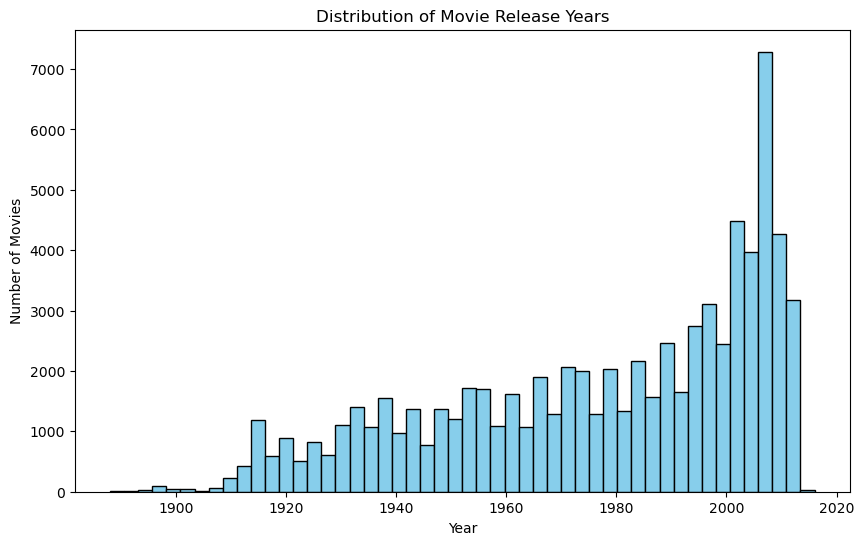

In [24]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(movies['Release year'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

Remove the Nan